In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import  load_house_data, run_gradient_descent 
from lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc
import seaborn as sns
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [ ]:
# load the dataset
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

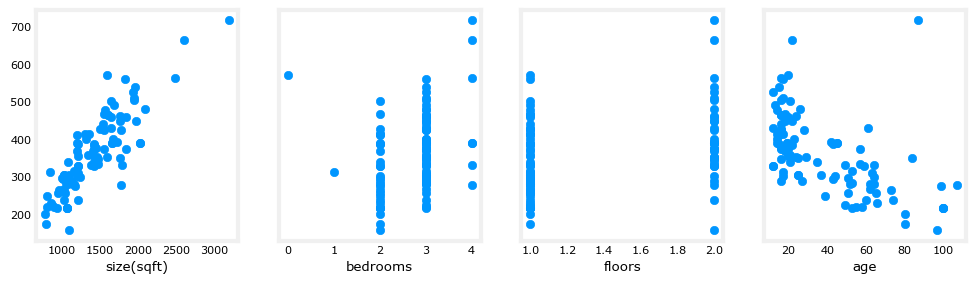

In [6]:
fig, ax = plt.subplots(1, X_train.shape[1], figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train)
    ax[i].set_xlabel(X_features[i])
plt.show()

In [7]:
def z_normalize_features(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [16]:
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)
X_mean = X_train - mu
X_norm = (X_train - mu) / sigma
w_norm, b_norm, hist = run_gradient_descent(X_norm, y_train, 1000, 1.0e-1, )

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.76170e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21086e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.2e-01  4.5e-01  5.3e-01 -1.7e-01 -9.6e-03
      200 2.19209e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.0e-02  1.5e-02  1.7e-02 -6.0e-03 -2.6e-07
      300 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.0e-03  5.1e-04  5.7e-04 -2.0e-04 -6.9e-12
      400 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.4e-05  1.7e-05  1.9e-05 -6.6e-06 -2.7e-13
      500 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.1e-06  5.6e-07  6.2e-07 -2.2e-07 -2.6e-13
      600 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.7e-08  1.9e-08  2.1e-08 -7.3e-09 -

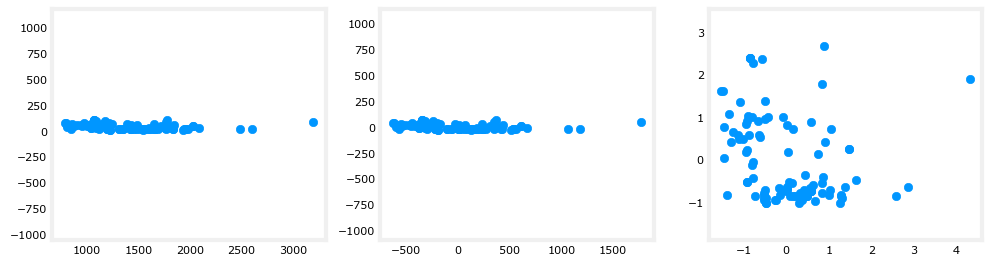

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

ax[0].scatter(X_train[:, 0], X_train[:, 3])
ax[0].axis("equal")

ax[1].scatter(X_mean[:, 0], X_mean[:, 3])
ax[1].axis("equal")

ax[2].scatter(X_norm[:, 0], X_norm[:, 3])
ax[2].axis("equal")
plt.show()

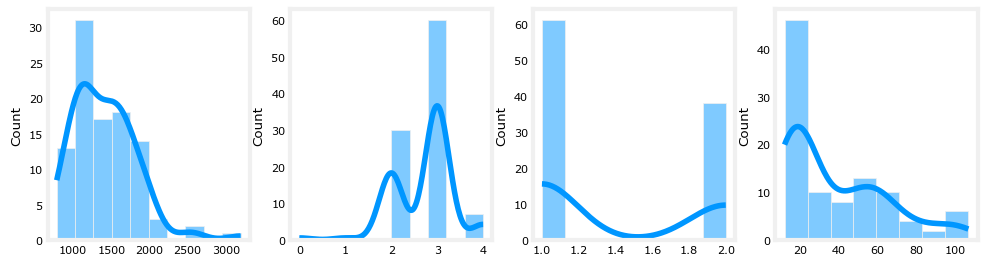

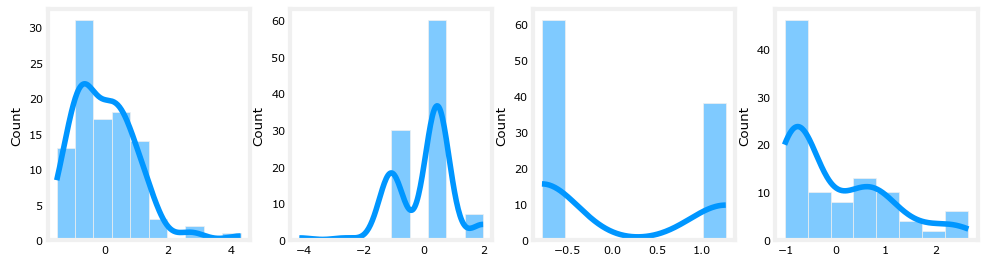

In [15]:
fig, ax = plt.subplots(1, X_train.shape[1], figsize=(12, 3))
for i in range(len(ax)):
    sns.histplot(X_train[:, i], kde=True, ax=ax[i])
plt.show()
fig, ax = plt.subplots(1, X_norm.shape[1], figsize=(12, 3))
for i in range(len(ax)):
    sns.histplot(X_norm[:, i], kde=True, ax=ax[i])
plt.show()

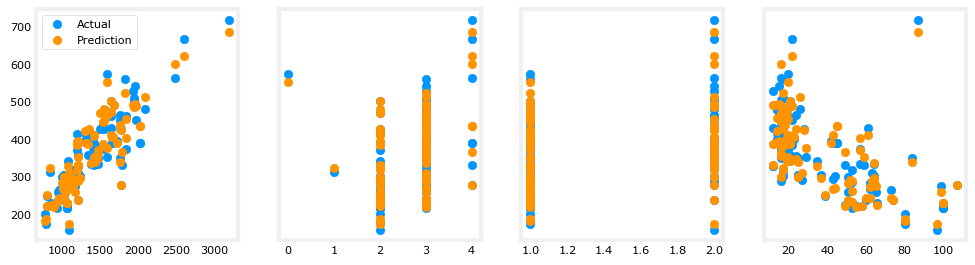

In [18]:
yp = np.zeros(X_train.shape[0])
for i in range(len(X_norm)):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm
fig, ax = plt.subplots(1, X_train.shape[1], figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label="Actual")
    ax[i].scatter(X_train[:, i], yp, label="Prediction")
ax[0].legend()
plt.show()